In [88]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear
import numpy as np
import matplotlib.pyplot as plt
import random

Using random seed: 87


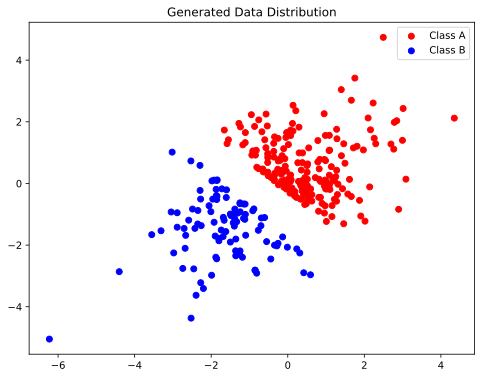

ValueError: Mode must be 'primal' or 'dual'.

In [89]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 200
n_B = 100
margin = 0.5

random_seed = random.randint(0, 1000)
print(f"Using random seed: {random_seed}")

listA, listB = TestLinear(w, b, n_A, n_B, margin, seed=random_seed)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

plt.figure(figsize=(8, 6))
plt.scatter(X_A[:, 0], X_A[:, 1], color="red", label="Class A")
plt.scatter(X_B[:, 0], X_B[:, 1], color="blue", label="Class B")
plt.legend()
plt.title("Generated Data Distribution")
plt.show()

# Train the SVM
svm = SVM(C=1.0, kernel="linear", lr=0.01, mode="primal_SGD", sigma=1.5, s=1.0)
svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, alpha=0.3)
plt.scatter(X_A[:, 0], X_A[:, 1], color="red", label="Class A")
plt.scatter(X_B[:, 0], X_B[:, 1], color="blue", label="Class B")
plt.legend()
plt.title("SVM Decision Boundary on Generated Data")
plt.show()